In [12]:
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
stream = ffmpeg.input('input.mp4')
out = ffmpeg.output(stream, 'pipe:', format='rawvideo', pix_fmt='rgb24')
r , _ = ffmpeg.run(out, capture_stdout=True)

In [24]:
probe = ffmpeg.probe('input.mp4')
video_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'video'), None)
width = int(video_stream['width'])
height = int(video_stream['height'])

In [25]:
images = np.frombuffer(r, np.uint8)
video = images.reshape([-1, height, width, 3])

In [11]:
video.shape

(209, 240, 320, 3)

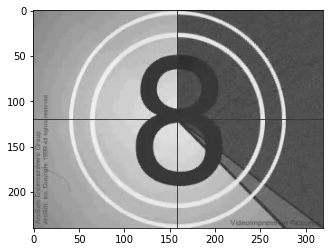

In [13]:
plt.imshow(video[10])

In [19]:
out, _ = (
    ffmpeg
    .input('input.mp4')
    .output('pipe:', format='rawvideo', pix_fmt='rgb24')
    .run(capture_stdout=True)
)
video = (
    np
    .frombuffer(out, np.uint8)
    .reshape([-1, height, width, 3])
)